

---
# Problem 1

To perform matrix multiplication between a (n, k) matrix A and a (k, m) matrix B, we have to perform n * m multiplications and additions for each element in the resulting (n, m) matrix C.
To compute each element in the resulting matrix C, we need to take the dot product of a row in matrix A and a column in matrix B. The dot product is the sum of the element-wise products of the two vectors. Therefore, we will perform k multiplications and k - 1 additions to compute the dot product.

Therefore, for computing a matrix C, 
*   The number of multiplications are n * m * k
*   The number of additions are n * m * (k - 1)





---
# Problem 2

In [ ]:
# Function for multiplying two matrices
def mat_mul(A, B):

    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
       print("Invalid matrix dimensions")
       return -1

    ans = []
    for row in range(0, rows_A):
        ans.append([])
        for col in range(0, cols_B):
            flag = 0
            for i in range(cols_A):
                flag += A[row][i] * B[i][col]
            ans[row].append(flag)
    return ans

In [ ]:
import time
import random
import numpy as np

# defining the matrices to be multiplied
N=10
A = [[random.random() for i in range(N)] for j in range(N)]
B = [[random.random() for i in range(N)] for j in range(N)]

start_time = time.perf_counter()
result = mat_mul(A, B)
end_time = time.perf_counter()
print(f"Time taken using list: {end_time - start_time:.6f} seconds")


start_time = time.perf_counter()
result = np.matmul(A, B)
end_time = time.perf_counter()
print(f"Time taken with NumPy: {end_time - start_time:.6f} seconds")

Time taken using list: 0.000399 seconds
Time taken with NumPy: 0.004158 seconds


In general, NumPy will be faster than using a list comprehension because it uses optimization techniques such as memory caching and multithreading. Also, it is implemented in C rather than in python which makes it more faster



---
# Problem 3

The time complexity for finding the median using the above mentioned method is O($n^2$).

According to me, the best method to find the median is to first sort it and then fetch its middle element. The time complexity taken by this method would be $O(n*logn)$ + $O(1)$. Where, $O(n*logn)$ is the time taken to sort the array and $O(1)$ is the time taken to fetch the middle element.

The implementation and comparison of both the methods is shown below:

In [76]:
import timeit
import numpy

# Dummy array
arr = [3, 7, 4, 9, 1, 2, 6, 5, 8]

# function using multiple iterations
def given_fun(arr):
    if len(arr) % 2 != 0:
        p = len(arr) // 2
        for i in range(p + 1):
            max = arr[0]
            index = 0
            for j in range(1, len(arr)):
                if arr[j] > max:
                    max = arr[j]
                    index = j
            arr[j] = float('-inf')
            
        return max

    if len(arr) == 0:
        return -1
    
    else:
        
        n = len(arr) // 2 - 1
        
        for i in range(n + 1):
            max = arr[0]
            index = 0
            for j in range(1, len(arr)):
                if arr[j] > max:
                    max = arr[j]
                    index = j
            arr[j] = float('-inf')
        
        maxj = max
        
        for j in range(1 , len(arr)):
            if(arr[j] > max):
                max = arr[j]
            
        maxo = max
        
        return (maxj + maxo) / 2

# My function which uses sorting
def fun(arr):
  arr.sort()
  size = len(arr)
  if size % 2 == 0:
        return (arr[size // 2] + arr[size // 2 - 1]) / 2
  else:
        return arr[size // 2]

# Using the timeit module to measure the execution time of the sorting algo
t = timeit.Timer(lambda: fun(arr))
print("Time taken by my function:", t.timeit(number=1000), "seconds")

# Using the timeit module to measure the execution time of the multiple iterations method
t = timeit.Timer(lambda: given_fun(arr))
print("Time taken by multi-pass:", t.timeit(number=1000), "seconds")

# Calculating the time taken by numpy.median function
t = timeit.Timer(lambda: numpy.median(arr))
print("numpy.median:", t.timeit(number=1000), "seconds")

Time taken by my function: 0.0007734730006632162 seconds
Time taken by multi-pass: 0.006999922999966657 seconds
numpy.median: 0.033717577998686465 seconds




---
# Problem 4

The gradient with respect to x and y is,
*   $df/dx = 2xy + (y^3)*cosx$
*   $df/dy = x^2 + (3y^2)*sinx$






---
# Problem 5

In [74]:
import jax
import jax.numpy as jnp
from jax import grad, jit, random

key = random.PRNGKey(7583)


def fun(x, y):
  return jnp.sum((x**2)*y + (y**3)*(jax.numpy.sin(x)))

# Defining the analytical solution for the gradient of f
def gradient(x, y):
  return ((2 * x * y + jnp.cos(x) * y ** 3), (x**2+3*(y**2)*jnp.sin(x)))

# Generating some random values of x and y
X = jnp.asarray(random.uniform(key, shape=(2,)))
Y = jnp.asarray(random.uniform(key, shape=(2,)))

# Using JAX to compute the gradient of fun
grad1 = jax.grad(fun, argnums=(0,1))


print("Gradient points given by Jax : ")
print( grad1(X,Y)[0] )
print( grad1(X,Y)[1] )

for i in range(0 , len(X)):
  print(gradient(X[i] , Y[i]))

Gradient points given by Jax : 
[0.06446373 0.00907266]
[0.04499593 0.00526347]
(DeviceArray(0.06446373, dtype=float32), DeviceArray(0.04499593, dtype=float32))
(DeviceArray(0.00907266, dtype=float32), DeviceArray(0.00526347, dtype=float32))


---
# Problem 6

In [ ]:
import sympy

# Defining the function f and the variables x and y using SymPy
x, y = sympy.symbols('x y')
f = (x**2)*y + (y**3)*(sympy.sin(x))

# Using SymPy to compute the gradient of f with respect to x and y
gradient = sympy.Matrix([f]).jacobian([x, y])

print(gradient)


Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


Using sympy, I got the same result.

---
# Problem 7

In [ ]:
# nested dictionaries
students = {
    2022: {
        'Branch 1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}],
        'Branch 2': []
    },
    2023: {
        'Branch 1': [],
        'Branch 2': []
    },
    2024: {
        'Branch 1': [],
        'Branch 2': []
    },
    2025: {
        'Branch 1': [],
        'Branch 2': []
    }
}

marks = students[2022]['Branch 1'][0]['Marks']
print(marks) 


{'Maths': 100, 'English': 70}


---
# Problem 8

In [10]:
class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Student:
    def __init__(self, roll, name, marks):
        self.roll = roll
        self.name = name
        self.marks = marks



database = [
    Year(2022, [
        Branch('Branch 1', [Student(1, 'N', {'Maths': 100, 'English': 70})]),
        Branch('Branch 2', [])
    ]),

    Year(2023, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
    
    Year(2024, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
    Year(2025, [
        Branch('Branch 1', []),
        Branch('Branch 2', [])
    ]),
]

print(database[0].branches[0].students[0].marks)


{'Maths': 100, 'English': 70}


---
# Problem 9

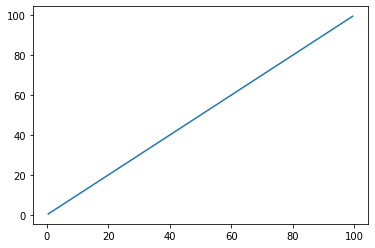

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

# Plotting the functions
ax.plot(x, x, label='x')
plt.show()

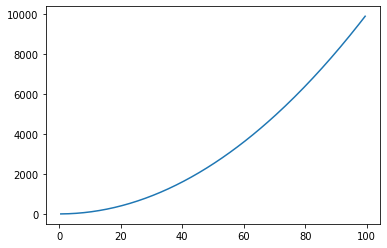

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

ax.plot(x, x**2, label='x^2')
plt.show()

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

ax.plot(x, x**3/100, label='x^3/100')
plt.show()

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

ax.plot(x, np.sin(x), label='sin(x)')
plt.show()

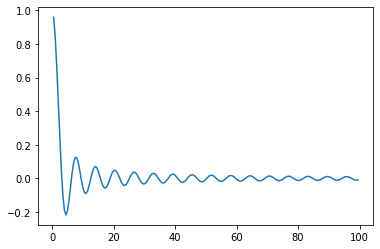

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

ax.plot(x, np.sin(x)/x, label='sin(x)/x')
plt.show()

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

ax.plot(x, np.log(x), label='log(x)')
plt.show()

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure and an axis
fig, ax = plt.subplots()

# Setting the domain for the plot as 0.5 to 100
x = np.arange(0.5, 100.0, 0.5)

ax.plot(x, np.exp(x), label='e^x')
plt.show()

---
# Problem 10

In [ ]:
import numpy as np
import pandas as pd

# Generating a matrix of size 20x5 containing random numbers from the range of 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Creating a Pandas dataframe from the matrix
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
print(df)

# To find the column with the highest standard deviation, I used the df.std() method and 
# passed the axis parameter as 0 to calculate the standard deviation across the columns.
# Then, I used the idxmax() method to find the column with the highest standard deviation.
column = df.std(axis=0).idxmax()
print(f"Column with highest standard deviation: {column}")

# To find the row with the lowest mean, I used the df.mean() method and pass the axis parameter as 1 to calculate the mean across the rows. 
# Then, I used the idxmin() method to find the row with the lowest mean.
row = df.mean(axis=1).idxmin()
print(f"Row with lowest mean: {row}")

           a         b         c         d         e
0   1.260390  1.405342  1.851102  1.701950  1.899315
1   1.607242  1.858384  1.056556  1.905516  1.651688
2   1.774901  1.982750  1.683218  1.930080  1.148602
3   1.693077  1.114704  1.612178  1.399053  1.156729
4   1.228794  1.491018  1.559366  1.362263  1.853584
5   1.032556  1.029683  1.020265  1.575386  1.155523
6   1.196912  1.690211  1.050468  1.506123  1.832424
7   1.555583  1.441600  1.298275  1.269676  1.505188
8   1.665076  1.072468  1.096759  1.435687  1.580234
9   1.127131  1.754825  1.975558  1.232067  1.442722
10  1.394184  1.584901  1.837706  1.306524  1.533170
11  1.989021  1.758777  1.099039  1.471175  1.232593
12  1.059572  1.987454  1.030120  1.921818  1.193726
13  1.790954  1.704544  1.134646  1.973427  1.508283
14  1.633356  1.494114  1.945137  1.202115  1.488931
15  1.843360  1.563089  1.220913  1.922235  1.518281
16  1.552454  1.272866  1.314018  1.778982  1.542919
17  1.298730  1.912517  1.431894  1.354239  1.

---
# Problem 11

In [ ]:
# adding column f as the sum of columns a, b, c, d, and e 
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

# adding column g with the condition (if df["f"] < 8 then df[g] = LT8, else df[g] = GT8)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)

# Finding the number of rows in the dataframe where the value in the column "g" is "LT8"
# I used the df[df["g"] == "LT8"] to select the rows where the value in the column "g" is "LT8"
# then used the shape attribute to get the number of rows. 
rows_lt8 = df[df["g"] == "LT8"].shape[0]
print(f"Number of rows where the value in the column 'g' is 'LT8': {rows_lt8}")

# Finding the standard deviation of the column "f" for the rows where the value in the column "g" is "LT8"
std_f_lt8 = df.loc[df["g"] == "LT8", "f"].std()
print(f"Standard deviation for lt8: {std_f_lt8}")

# Find the standard deviation of the column "f" for the rows where the value in the column "g" is "GT8"
std_f_gt8 = df.loc[df["g"] == "GT8", "f"].std()
print(f"Standard deviation for gt8: {std_f_gt8}")

           a         b         c         d         e         f    g
0   1.591459  1.660724  1.902094  1.150880  1.253726  7.558883  LT8
1   1.610808  1.691199  1.228854  1.593770  1.757466  7.882097  LT8
2   1.214276  1.864512  1.326646  1.400468  1.012126  6.818028  LT8
3   1.381286  1.752604  1.584666  1.840248  1.894416  8.453221  GT8
4   1.740530  1.748690  1.419446  1.723698  1.728179  8.360544  GT8
5   1.300792  1.796090  1.996422  1.523181  1.354313  7.970798  LT8
6   1.829102  1.092691  1.813282  1.052524  1.454331  7.241931  LT8
7   1.290047  1.670813  1.263147  1.579005  1.935827  7.738839  LT8
8   1.074829  1.166432  1.707994  1.336478  1.555487  6.841220  LT8
9   1.188454  1.460791  1.870239  1.156205  1.401275  7.076964  LT8
10  1.434914  1.970616  1.944821  1.981042  1.793107  9.124500  GT8
11  1.743472  1.886184  1.230006  1.092526  1.323437  7.275625  LT8
12  1.632003  1.325824  1.401225  1.795168  1.135978  7.290199  LT8
13  1.891398  1.094803  1.267937  1.506711  1.21

---
# Problem 12

In [ ]:
import numpy as np

# Creating a 2D array
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Printing the original array
print("Initial array:")
print(a)

# Multiplying the scalar 10 to the array
b = a * 10

# Printing the result
print("\nAfter multiplying a scalar to the array:")
print(b)


Original array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

After adding a scalar to the array:
[[10 20 30]
 [40 50 60]
 [70 80 90]]


I multiplied the scalar 10 to the array 'a' of shape (3, 3). NumPy automatically broadcasts the scalar to an array of the same shape as 'a' and performs the multiplicatoin element-wise. This is an example of broadcasting a scalar to an array.

Broadcasting is a powerful feature in NumPy that allows to perform arithmetic operations between arrays of different shapes in a consistent and efficient way.

---
# Problem 13

In [ ]:
import numpy as np

# My function which returns the index of the element having min value
def fun(arr):
    index = 0
    val = arr[0]
    for i in range(0, len(arr)) :
      if (arr[i]<val):
        val = arr[i]
        index = i

    return index

# Creating a numpy array
arr = np.array([3, 10, 7, 1, 2])

# Getting the index of the minimum element from my function
index1 = fun(arr)

# Getting the index of the min element using argmin
index2 = np.argmin(arr)

if (index1 == index2):
  print("Correct!")

else:
  print("Incorrect!")

Correct!
